In [5]:
import torch
import torch.nn as nn
from torchvision import datasets, transforms, models
from torch.utils.data import DataLoader
from dataloader import RealVsGeneratedDataset
from pytorch_grad_cam import GradCAM, HiResCAM, ScoreCAM, GradCAMPlusPlus, AblationCAM, XGradCAM, EigenCAM, FullGrad
from pytorch_grad_cam.utils.model_targets import ClassifierOutputTarget
from pytorch_grad_cam.utils.image import show_cam_on_image

In [13]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

def visualize_image_grad_cam(cam, path, inputs, labels, i):
    grayscale_cam = cam(input_tensor=inputs, targets=None)
    grayscale_cam = grayscale_cam[i, :]

    image_path = path[i]
    splitpath = image_path.split('/')
    splitpath[-2] = 'masks'
    mask_path = '/'.join(splitpath)
    mask = cv2.imread(mask_path)
    mask = cv2.cvtColor(mask, cv2.COLOR_BGR2RGB)

    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    if labels[i]:
        print("Generated Image ---------------------------")
    else:
        print("Real Image ---------------------------")

    image_normalized = image.astype(np.float32) / 255.0
    mask_normalized = mask.astype(np.float32) / 255.0
    image_normalized = cv2.resize(image_normalized, (224, 224))
    mask_normalized = cv2.resize(mask_normalized, (224, 224))

    viz_arr_image = show_cam_on_image(image_normalized, grayscale_cam, use_rgb=True)
    viz_arr_mask = show_cam_on_image(mask_normalized, grayscale_cam, use_rgb=True)

    fig, axs = plt.subplots(1, 2)
    axs[0].imshow(viz_arr_image)
    axs[0].axis('off')  # Do not display axes for better visualization
    axs[0].set_title('GradCAM on Image')

    axs[1].imshow(viz_arr_mask)
    axs[1].axis('off')  # Do not display axes for better visualization
    axs[1].set_title('GradCAM on Mask')

    plt.show()


In [3]:
model = models.resnet50(pretrained=True)
model.conv1 = nn.Conv2d(6, 64, kernel_size=7, stride=2, padding=3, bias=False)  # Adjust for 6 channels

# Ensure the rest of the model is properly configured for binary classification
num_features = model.fc.in_features
model.fc = nn.Linear(num_features, 2)  # 2 classes: Real and Generated

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = model.to(device)

/data2/.conda/envs/vqa/lib/python3.10/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/data2/.conda/envs/vqa/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [4]:
model_path = 'epoch_19_loss_0.0003_acc_1.0000_checkpoint.pth'
model.load_state_dict(torch.load(model_path))
model.eval()
print(f'Model loaded from {model_path}.')

target_layers = [model.layer4[-1]]
cam = GradCAM(model=model, target_layers=target_layers)


Model loaded from epoch_19_loss_0.0003_acc_1.0000_checkpoint.pth.


In [9]:
transform = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406],  # Adjusted for 3 channels
                         std=[0.229, 0.224, 0.225]),
])

test_dataset = RealVsGeneratedDataset(root_dir="dataset", phase='val', transform=transform)
test_dataloader = DataLoader(test_dataset, batch_size=32, shuffle=True)
path, inputs, labels = next(iter(test_dataloader))
labels


tensor([1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
        0, 0, 1, 0, 1, 0, 0, 1])

tensor([ 5.9510, -5.9801], device='cuda:0', grad_fn=<SelectBackward0>)
Real Image ---------------------------


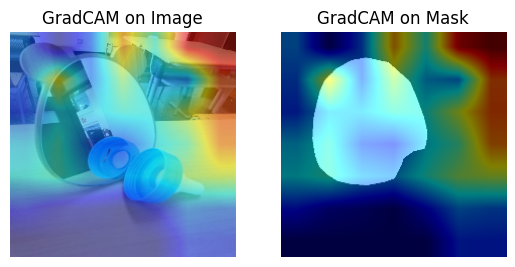

In [20]:
i = 5
print(cam.outputs[i])
visualize_image_grad_cam(cam, path, inputs, labels, i)


tensor([-9.3098,  9.5217], device='cuda:0', grad_fn=<SelectBackward0>)
Generated Image ---------------------------


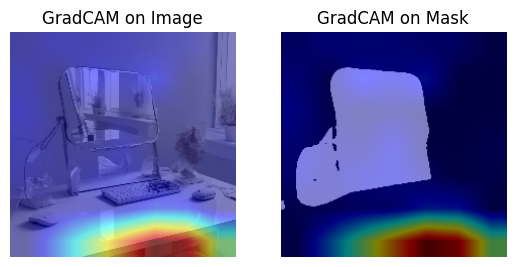

In [21]:
i = 2
print(cam.outputs[i])
visualize_image_grad_cam(cam, path, inputs, labels, i)


tensor([-4.0129,  4.1112], device='cuda:0', grad_fn=<SelectBackward0>)
Generated Image ---------------------------


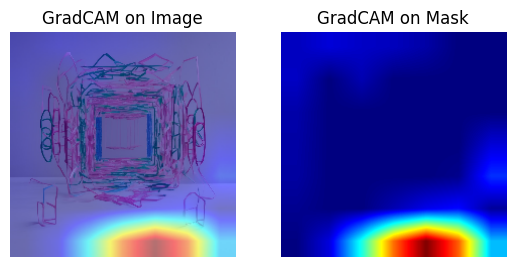

In [22]:
i = 0
print(cam.outputs[i])
visualize_image_grad_cam(cam, path, inputs, labels, i)


tensor([ 3.1317, -3.0169], device='cuda:0', grad_fn=<SelectBackward0>)
Real Image ---------------------------


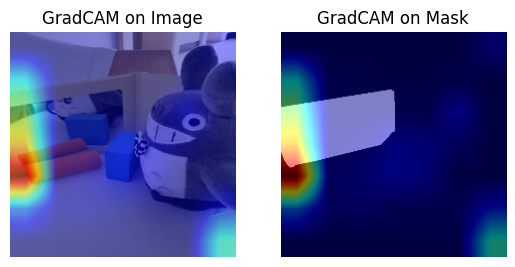

In [24]:
i = 19
print(cam.outputs[i])
visualize_image_grad_cam(cam, path, inputs, labels, i)


tensor([ 6.5929, -6.6222], device='cuda:0', grad_fn=<SelectBackward0>)
Real Image ---------------------------


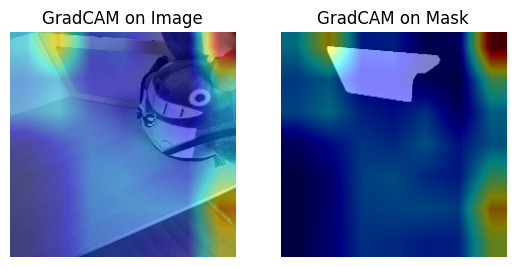

In [25]:
i = 22
print(cam.outputs[i])
visualize_image_grad_cam(cam, path, inputs, labels, i)


tensor([ 3.2276, -3.2879], device='cuda:0', grad_fn=<SelectBackward0>)
Real Image ---------------------------


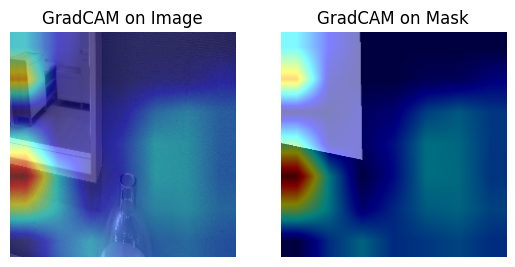

In [26]:
i = 13
print(cam.outputs[i])
visualize_image_grad_cam(cam, path, inputs, labels, i)


tensor([-10.0198,  10.2415], device='cuda:0', grad_fn=<SelectBackward0>)
Generated Image ---------------------------


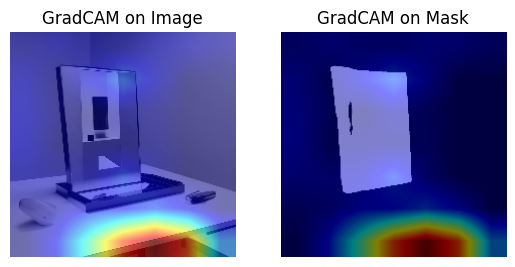

In [28]:
i = 17
print(cam.outputs[i])
visualize_image_grad_cam(cam, path, inputs, labels, i)


tensor([ 3.4288, -3.5139], device='cuda:0', grad_fn=<SelectBackward0>)
Real Image ---------------------------


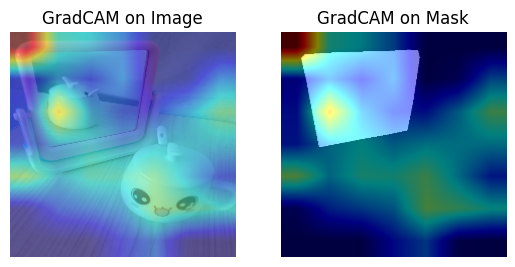

In [30]:
i = 30
print(cam.outputs[i])
visualize_image_grad_cam(cam, path, inputs, labels, i)


tensor([ 5.9426, -5.9768], device='cuda:0', grad_fn=<SelectBackward0>)
Real Image ---------------------------


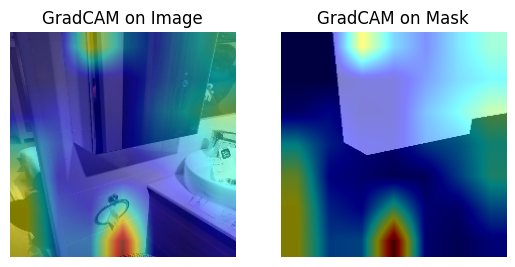

In [31]:
i = 12
print(cam.outputs[i])
visualize_image_grad_cam(cam, path, inputs, labels, i)


tensor([ 4.4492, -4.4104], device='cuda:0', grad_fn=<SelectBackward0>)
Real Image ---------------------------


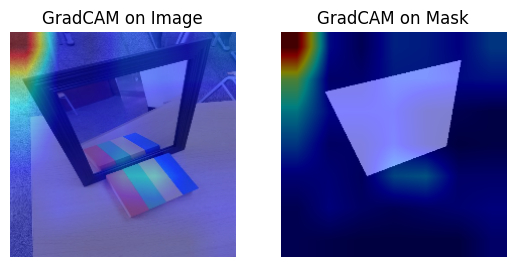

In [32]:
i = 9
print(cam.outputs[i])
visualize_image_grad_cam(cam, path, inputs, labels, i)
